## introduction to scikit-learn 
*what we will cover 
*an end to end scikit learn workflow 
*getting dataready 


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
heartdisease=pd.read_csv("heart-disease.csv")

#create X(features matrix)
X= heartdisease.drop("target", axis=1)
#create y (labels)
y= heartdisease["target"]
#choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
#we will keep the default hyperparamenters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [2]:
# fit the model to the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [3]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [4]:
#make a prediction 
y_preds=clf.predict(X_test)
y_preds

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [5]:
y_test

132    1
200    0
235    0
218    0
224    0
      ..
45     1
286    0
24     1
15     1
127    1
Name: target, Length: 61, dtype: int64

In [6]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [7]:

# evaluate the model 

clf.score(X_train, y_train)

1.0

In [8]:
clf.score(X_test,y_test)

0.7704918032786885

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.66      0.73        29
           1       0.74      0.88      0.80        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [10]:
confusion_matrix(y_test,y_preds)

array([[19, 10],
       [ 4, 28]], dtype=int64)

In [11]:
accuracy_score(y_test, y_preds)

0.7704918032786885

In [12]:
#improve the model 
#try different amount of n_estimators
np.random.seed(42)
for i in range (10,100,10):
    print(f"Trying model with {i} estimators..")
    clf= RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}%")
    print(" ")

Trying model with 10 estimators..
model accuracy on test set: 85.25%
 
Trying model with 20 estimators..
model accuracy on test set: 75.41%
 
Trying model with 30 estimators..
model accuracy on test set: 75.41%
 
Trying model with 40 estimators..
model accuracy on test set: 78.69%
 
Trying model with 50 estimators..
model accuracy on test set: 73.77%
 
Trying model with 60 estimators..
model accuracy on test set: 75.41%
 
Trying model with 70 estimators..
model accuracy on test set: 75.41%
 
Trying model with 80 estimators..
model accuracy on test set: 80.33%
 
Trying model with 90 estimators..
model accuracy on test set: 80.33%
 


In [13]:
#save the model and load it
import pickle 
pickle.dump(clf, open("random_forst_model1.pkl","wb"))

In [14]:
loaded_model=pickle.load(open("random_forst_model1.pkl","rb"))
loaded_model.score(X_test,y_test)

0.8032786885245902

## getting our data ready 

three main things 
1 split data into features and labels (usually 'X' & 'y')
2 filing (also called imputing)or disregarding missing values 
3 converting non numerical values to numerical values also called feature encoding

In [15]:
heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
X = heartdisease.drop("target", axis=1)
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
y=heartdisease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [18]:
# split the data into training and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size =0.2)

In [19]:
X_train.shape

(242, 13)

In [20]:
X.shape

(303, 13)

In [21]:
len(heartdisease)

303

## make sure its all numerical

In [22]:
carsales=pd.read_csv("exported-car-sales.csv")
carsales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price
0,0,Toyota,White,150043,4,4000
1,1,Honda,Red,87899,4,5000
2,2,Toyota,Blue,32549,3,7000
3,3,BMW,Black,11179,5,22000
4,4,Nissan,White,213095,4,3500
5,5,Toyota,Green,99213,4,4500
6,6,Honda,Blue,45698,4,7500
7,7,Honda,Blue,54738,4,7000
8,8,Toyota,White,60000,4,6250
9,9,Nissan,White,31600,4,9700


In [23]:
carsales.dtypes

Unnamed: 0        int64
Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [24]:
# build ml model
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.4859602150537633

In [25]:
# trun categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalfeatures = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categoricalfeatures)],remainder="passthrough")
transformed_X= transformer.fit_transform(X)
transformed_X

ValueError: A given column is not a column of the dataframe

In [26]:
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
pd.DataFrame(transformed_X)

NameError: name 'transformed_X' is not defined

In [28]:
dummies =pd.get_dummies(carsales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,0,0,1,0,0,0,0,1
1,4,0,1,0,0,0,0,0,1,0
2,3,0,0,0,1,0,1,0,0,0
3,5,1,0,0,0,1,0,0,0,0
4,4,0,0,1,0,0,0,0,0,1
5,4,0,0,0,1,0,0,1,0,0
6,4,0,1,0,0,0,1,0,0,0
7,4,0,1,0,0,0,1,0,0,0
8,4,0,0,0,1,0,0,0,0,1
9,4,0,0,1,0,0,0,0,0,1


In [29]:
#lets refit the model 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
  
model.fit(X_train, y_train)

NameError: name 'transformed_X' is not defined

## what if there were missing values 

1. Fill them with some value(also known as imputation)
2. remove the samples with missing data altogether.

In [30]:
carsalesmissing = pd.read_csv("car-sales-missing-data.csv")

In [31]:
carsalesmissing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,NaN,3.0,7000.0
3,BMW,Black,11179.0,5.0,2000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,NaN,4.0,4500.0
6,Honda,NaN,NaN,4.0,7500.0
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,9700.0


In [32]:
carsalesmissing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [33]:
carsalesmissing["Price"].dtype

dtype('float64')

In [34]:





# create X and y
X = carsalesmissing.drop("Price",axis=1)
y=carsalesmissing["Price"]

In [35]:
# lets try and convert our data to numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalfeatures = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categoricalfeatures)],remainder="passthrough")
transformed_X= transformer.fit_transform(X)
transformed_X

<10x16 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [36]:
carsalesmissing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,NaN,3.0,7000.0
3,BMW,Black,11179.0,5.0,2000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,NaN,4.0,4500.0
6,Honda,NaN,NaN,4.0,7500.0
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,9700.0


#### Option 1 fill this missing data with pandas


In [37]:
# fill the make column 
carsalesmissing["Make"].fillna("missing", inplace=True)

#fill the colour column
carsalesmissing["Colour"].fillna("missing", inplace=True)

#fill the odometr 
carsalesmissing["Odometer"].fillna("missing", inplace=True)
carsalesmissing["Doors"].fillna(4, inplace=True)



In [38]:


carsalesmissing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       2
dtype: int64

In [39]:
#remove rows with msssing price 
carsalesmissing.dropna(inplace=True)

In [40]:


carsalesmissing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

In [41]:
len(carsalesmissing)

8

In [42]:
carsalesmissing["Price"]=carsalesmissing["Price"].astype(int)

In [43]:
X= carsalesmissing.drop("Price",axis=1)
y=carsalesmissing["Price"]

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalfeatures = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categoricalfeatures)],remainder="passthrough")
transformed_X= transformer.fit_transform(X)
transformed_X

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

## CHOOSING THE RIGHT ML MODEL AND ALGORITHMS 



##Sklearn refers to machine learning models algoirthms as estimators
##classification problem- predicting a category (heartdisease or not)
##sometimes you'll see clf short for classifier used as a classification estimator 
##regression problem prediccting a  ume (selling prce of a car)

In [45]:
##get california housing dataset 
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

In [46]:
#why did we do this?
housing_df["target"]= housing["target"]
housing_df.head()

NameError: name 'housing_df' is not defined

In [47]:
housing_df=housing_df.drop("MedHouseVal", axis=1)
#why do we have to write axis here?

NameError: name 'housing_df' is not defined

In [48]:
housing_df

NameError: name 'housing_df' is not defined

In [49]:
#import algorithm
from sklearn.linear_model import Ridge
#setup random seed
np.random.seed(42)
#create data 
X=housing_df.drop("target", axis=1)
y=housing_df["target"]

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate and fit the model (on the training set)
model =Ridge()
model.fit(X_train, y_train)

#check the score of the model 
model.score(X_test, y_test)

NameError: name 'housing_df' is not defined

In [50]:
#import algorithm
from sklearn.ensemble import RandomForestRegressor
#setup random seed
np.random.seed(42)
#create data 
X=housing_df.drop("target", axis=1)
y=housing_df["target"]

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

#check the score of the model 
model.score(X_test, y_test)

NameError: name 'housing_df' is not defined

## picking a ml model for a classification problem 

In [51]:
heartdisease=pd.read_csv("heart-disease.csv")
heartdisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [52]:
from sklearn.svm import LinearSVC
np.random.seed(42)
#create data 
X=heartdisease.drop("target", axis=1)
y=heartdisease["target"]

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate and fit the model (on the training set)
clf = LinearSVC()
clf.fit(X_train, y_train)

#check the score of the model 
clf.score(X_test, y_test)

C:\Users\Comp\desktop\mlproject1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [53]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
#create data 
X=heartdisease.drop("target", axis=1)
y=heartdisease["target"]

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#check the score of the model 
clf.score(X_test, y_test)

0.8524590163934426

Tidbit 
1. If you have structured data used ensemble methods 
2. if you  have instructured data, use deep learning or transfer learning.


## FIT THE MODEL ON OUR DATA AND USE IT FOR PREDICTION

In [54]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
#create data 
X=heartdisease.drop("target", axis=1)
y=heartdisease["target"]

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#check the score of the model 
clf.score(X_test, y_test)

0.8524590163934426

In [55]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### make predictions 

## two ways to make predictions predict() and predict_proba()

In [56]:
clf.predict(np.array[1,2,3,4,5,6]) #this doesnt work

TypeError: 'builtin_function_or_method' object is not subscriptable

In [57]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
np.array(y_test)

In [ ]:
# compare predictions to truth to evaluate the model 
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

In [58]:
clf.score(X_test, y_test)

0.8524590163934426

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.3114754098360656

# make predictions with predict_proba()

it returns probabilities of all classifications

In [60]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [61]:
# lets predict() on same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [62]:
heartdisease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [63]:
housing_df.head()

NameError: name 'housing_df' is not defined

In [64]:
#import algorithm
from sklearn.ensemble import RandomForestRegressor
#setup random seed
np.random.seed(42)
#create data 
X=housing_df.drop("target", axis=1)
y=housing_df["target"]

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate and fit the model (on the training set)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

#check the score of the model 
model.score(X_test, y_test)

y_preds = model.predict(X_test)

NameError: name 'housing_df' is not defined

In [65]:
y_preds

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [66]:
np.array(y_test[:10])

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [67]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.6885245901639344

In [68]:
housing_df["target"]


NameError: name 'housing_df' is not defined

## evaluating a ml model 

three ways to evaluate scikit learn models 
estimator built in score()method 
scroing parameter 
problem specific metric functions 

## evaluating a model woth score method 

In [69]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
#create data 
X=heartdisease.drop("target", axis=1)
y=heartdisease["target"]

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)

#check the score of the model 
clf.score(X_train, y_train)
# highest value for score is 1.0

0.9834710743801653

In [70]:
clf.score(X_test, y_test)

0.8360655737704918

## lets use score on our regression problem 

In [71]:
#import algorithm
from sklearn.ensemble import RandomForestRegressor
#setup random seed
np.random.seed(42)
#create data 
X=housing_df.drop("target", axis=1)
y=housing_df["target"]

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate and fit the model (on the training set)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

#check the score of the model 
model.score(X_test, y_test)

# thr defuault score() evalutaio metric is r_squared for regression algorithms

NameError: name 'housing_df' is not defined

In [72]:
model.score(X_train,y_train)

0.8276553355866731

In [73]:
y_test.mean()

0.5245901639344263

## 4.2 Evaluating a model usig the scoring parameter

In [74]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
#create data 
X=heartdisease.drop("target", axis=1)
y=heartdisease["target"]

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)

#check the score of the model 
clf.score(X_train, y_train)
# highest value for score is 1.0

0.9834710743801653

In [75]:
clf.score(X_test, y_test)

0.8360655737704918

In [76]:
cross_val_score(clf, X, y)

array([0.85245902, 0.81967213, 0.78688525, 0.75      , 0.75      ])

In [77]:
cross_val_score(clf, X, y, cv=10)

array([0.80645161, 0.83870968, 0.90322581, 0.83333333, 0.86666667,
       0.6       , 0.73333333, 0.93333333, 0.73333333, 0.73333333])

In [78]:
np.random.seed(42)
clf_single_score = clf.score(X_test, y_test)

#take mean of 5 fold cross validation score 
clf_cross_val_score=np.mean(cross_val_score(clf,X ,y, cv=5))

#compare the two 
clf_single_score,clf_cross_val_score

(0.8360655737704918, 0.7625683060109288)

In [79]:
# default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [80]:
#scroing paramneter is set to none in default 
cross_val_score(clf,X ,y, cv=5, scoring=None)

array([0.78688525, 0.85245902, 0.83606557, 0.76666667, 0.76666667])

## CLASSIFICATION MODEL EVALUATION METIRCS 
#1. accuracy 
#2. Area under roc curve 
#3 confusion matrix 
#4 classification report 

In [81]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier 
np.random.seed(42)
#create data 
X=heartdisease.drop("target", axis=1)
y=heartdisease["target"]

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)

#check the score of the model 
clf.score(X_train, y_train)
# highest value for score is 1.0
cross_val_score(clf, X,y, cv=5)


array([0.85245902, 0.81967213, 0.78688525, 0.75      , 0.75      ])

In [82]:
np.mean(cross_val_score(clf, X,y, cv=5))

0.7951366120218579

In [83]:
print(f"heart disease classifier Accuracy: {np.mean(cross_val_score(clf, X,y, cv=5))*100}")

heart disease classifier Accuracy: 78.54098360655738


area under the reciever operating characteristic curve()

ROC curves are comparison of a model's true postive rate (tpr)

vs a modelfpr(false positive rate)


*true positive= model preidcts 1 wen truth is 0
*false positive= model predicts 1 when truth is 0
true negative= model preidcts 0 when truth is 0
false negative model predicts 0 when truth is 1


In [84]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [85]:
from sklearn.metrics import roc_curve
clf.fit(X_train, y_train)
#make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10],len(y_probs)

(array([[1. , 0. ],
        [0.4, 0.6],
        [0.6, 0.4],
        [0.4, 0.6],
        [0.6, 0.4],
        [0. , 1. ],
        [0.8, 0.2],
        [0.8, 0.2],
        [0. , 1. ],
        [0.8, 0.2]]),
 61)

In [86]:
y_probspositive=y_probs[:,1]
y_probspositive

array([0. , 0.6, 0.4, 0.6, 0.4, 1. , 0.2, 0.2, 1. , 0.2, 1. , 0.8, 0.4,
       0.2, 1. , 0.4, 1. , 1. , 0.2, 0.4, 0.8, 1. , 0.8, 0.8, 1. , 0. ,
       0.6, 0. , 0. , 1. , 1. , 1. , 0. , 0.6, 1. , 0.6, 0.6, 0.6, 0. ,
       1. , 0. , 0.2, 0.8, 0. , 1. , 0.8, 0.6, 0. , 0.6, 1. , 0.8, 0.8,
       0.8, 0.8, 0.4, 0.8, 0. , 0.2, 0.8, 0.8, 0.8])

In [87]:
#calculate fpr,tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test, y_probspositive)

#check the false psootive rates 
fpr,tpr

(array([0.        , 0.        , 0.11111111, 0.25925926, 0.44444444,
        0.66666667, 1.        ]),
 array([0.        , 0.44117647, 0.76470588, 0.91176471, 0.94117647,
        0.97058824, 1.        ]))

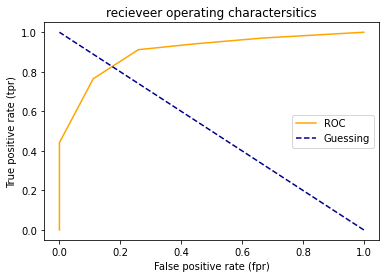

In [88]:
#create a function for plotting ROC curves 
import matplotlib.pyplot as plt 
def plot_roc_curve(fpr, tpr): 
    """ plots a roc curve given the false positve rate and true 
    positive rate (tpr) of a model."""

# plot roc curve 
plt.plot(fpr, tpr, color="orange", label="ROC")

#plot line with no predictive power (baseline)
plt.plot([1,0],[0,1], color="darkblue", linestyle="--",label="Guessing")

plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.title("recieveer operating charactersitics")
plt.legend()
plt.show()
plot_roc_curve(fpr, tpr)

In [89]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probspositive)

0.9035947712418301

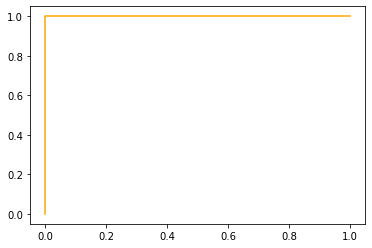

In [90]:
#plot perfect roc curve 
fpr, tpr ,threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.show()
plot_roc_curve(fpr, tpr)

In [91]:
#perfect AUC SCORE 
roc_auc_score(y_test, y_test)

1.0

## confusion matirx

a confusion matrix is a quick way to compare the lables a model predicts and the actual lables it was supposed to predict. In essence giving you the idea of where the model is getting confused. 

In [92]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[20,  7],
       [ 3, 31]], dtype=int64)

In [93]:
pd.crosstab(y_test,y_preds,rownames=["actual labels"],
           colnames=["predicted labels"])

predicted labels,0,1
actual labels,,
0,20,7
1,3,31


<AxesSubplot:>

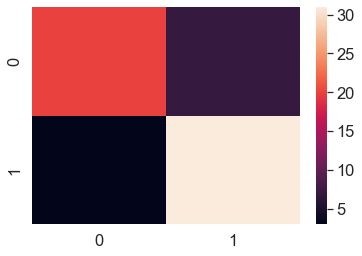

In [94]:
# make our confusion matrix more visual 


import seaborn as sns 
sns.set(font_scale=1.5)

conf_mat=confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat)

In [95]:
import sklearn 
sklearn.__version__

'1.0.2'

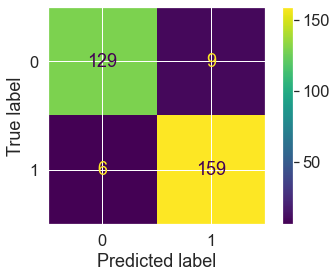

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X,y=y)

## improving a model 

first predictions =baseline predictions
first model = baseline model
from a data perspective 
* we could collect more data more data more better 
* could we improve our data

from a model perspective 
* is their a better model we could use ?
* could we improve the current model 
parameters = model finds these patterns in data 
hyperparameters = settings on a model you can adjust to (improve its ability ot find patterns)


In [97]:
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier()

In [98]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## tuning hyperparamters by hand 

Lets make three sets training , validation and test.

In [99]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We will try to adjust the following models 

* max depth 
* max features 
* min_samples_leaf 
* n_estimators
* min_samples_split

In [126]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision =precision_score(y_true,y_preds)
    recall =recall_score(y_true, y_preds)
    f1 =f1_score(y_true,y_preds)
    metric_dict={"accuracy": round(accuracy, 2),
                "precision": round(precision, 2),
                "recall": round(recall, 2),
                "f1": round(f1, 2)}
    print(f"Acc : {accuracy * 100: .2f}%")
    print(f"Precision : {precision: .2f}%")
    print(f"Recall : {recall: .2f}%")
    print(f"F1 score : {f1:.2f}%")
    return metric_dict

In [128]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data 

heartdiseaseshuffled = heartdisease.sample(frac=1)

X =heartdiseaseshuffled.drop("target", axis =1)
y=heartdiseaseshuffled["target"]

train_split= round(0.7*len(heartdiseaseshuffled))
# 70 percdnt of the data

valid_split = round(train_split + 0.15*len(heartdiseaseshuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split],y[train_split: valid_split]
X_test, y_test =X[:valid_split], y[:valid_split]

len(X_train), len(X_valid), len(X_test)
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
#make baseline predictions
y_preds=clf.predict(X_valid)

#evaluate the classifier on validationset 
baseline_metrics=evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc :  82.22%
Precision :  0.81%
Recall :  0.88%
F1 score : 0.85%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [132]:
np.random.seed(42)
#create a second classifier with different paramters 
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)
# make predictions with differnet hyperparamters 
y_preds_2 = clf_2.predict(X_valid)

#evaluate the 2nd classifier 
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc :  82.22%
Precision :  0.84%
Recall :  0.84%
F1 score : 0.84%


In [134]:
clf_3= RandomForestClassifier(n_estimators=100, max_depth=10)
clf_3.fit(X_train, y_train)
# make predictions with differnet hyperparamters 
y_preds_3 = clf_2.predict(X_valid)

#evaluate the 2nd classifier 
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc :  82.22%
Precision :  0.84%
Recall :  0.84%
F1 score : 0.84%


## hyperparamter tuning with randomizedsearchcv

In [139]:
from sklearn.model_selection import RandomizedSearchCV

grid ={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth": [None, 5, 10, 20, 30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#split into X and y 
X = heartdiseaseshuffled.drop("target", axis=1)
y=heartdiseaseshuffled["target"]


#split into train and test splits 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instantiate RandomForestCLassifier
clf =RandomForestClassifier(n_jobs=10)

# setup randomized seaarchcv
rs_clf=RandomizedSearchCV(estimator=clf, 
                          param_distributions= grid,
                         n_iter=10,
                          #number of models to try
                         cv=5,
                         verbose=2)
# fit the randomizedsearchcv version of clf 

rs_clf.fit(X_train,y_train);
#cv stands for cross valiation so it will automatically take validation
#sets for us.It will try different paramters for different valiadatins upto 
#10 different models.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   9.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [140]:
#calling best params on it 
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [141]:
# make predcictions with the best paramters 
rs_y_preds= rs_clf.predict(X_test)
#evalute the predictions 
rs_metrics= evaluate_preds(y_test, rs_y_preds)

Acc :  81.97%
Precision :  0.77%
Recall :  0.86%
F1 score : 0.81%


# you won't always find improvements after running it.
## Tuning hyperparameters with gridsearchcv

In [155]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [156]:
# it is like a brute search force going through every combination in the given paramters 
grid_2={'n_estimators': [10, 100,1200],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 6],
 'min_samples_leaf': [1, 4]}

In [157]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

#split into X and y 
X = heartdiseaseshuffled.drop("target", axis=1)
y=heartdiseaseshuffled["target"]


#split into train and test splits 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instantiate RandomForestCLassifier
clf =RandomForestClassifier(n_jobs=10)

# setup randomized seaarchcv
gs_clf=GridSearchCV(estimator=clf, 
                          param_grid= grid_2,
                         cv=5,
                         verbose=2)
# fit the randomizedsearchcv version of clf 

gs_clf.fit(X_train,y_train);
#cv stands for cross valiation so it will automatically take validation
#sets for us.It will try different paramters for different valiadatins upto 
#10 different models.


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_es

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.9s
[CV] END max_depth=

In [159]:
gs_y_preds= gs_clf.predict(X_test)

#evaluate the preditictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc :  83.61%
Precision :  0.78%
Recall :  0.89%
F1 score : 0.83%


lets compare our differnet model metircs 

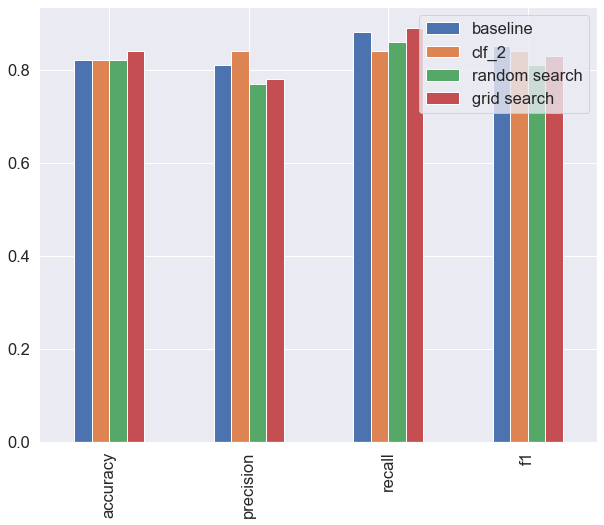

In [161]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                             "clf_2":clf_2_metrics,
                             "random search":rs_metrics,
                             "grid search":gs_metrics},
                            )
compare_metrics.plot.bar(figsize=(10,8));

## saving and loading trained machine learning models 

two ways to save and load ml models;
* with pythons pickle method
* with joblib module

# pickle

In [163]:
import pickle 

#save an existing model to file 
pickle.dump(gs_clf, open("gs_radom_random_forest_model_1.pkl", "wb"))

In [165]:
# load a saved model
loaded_pickle_model = pickle.load(open("gs_radom_random_forest_model_1.pkl", "rb"))

In [166]:
#make some predictions 
pickle_y_preds=loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc :  83.61%
Precision :  0.78%
Recall :  0.89%
F1 score : 0.83%


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

## joblib

In [167]:
from joblib import dump, load
#save model to file 
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [168]:
#import a saved joblib 
loaded_job_model= load(filename="gs_random_forest_model_1.joblib")

In [170]:
#make and evaluate joblib predictions 
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc :  83.61%
Precision :  0.78%
Recall :  0.89%
F1 score : 0.83%


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

## putting it all together

In [171]:
data = pd.read_csv("car-sales-missing-data.csv")
data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,NaN,3.0,7000.0
3,BMW,Black,11179.0,5.0,2000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,NaN,4.0,4500.0
6,Honda,NaN,NaN,4.0,7500.0
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,9700.0


In [172]:
data.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price       float64
dtype: object

In [173]:
data.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

## steps we want to do 
* filll missing data 
* convert data to numbers 
* build a model om data 